# Resultados

## Testando os modelos

In [92]:
from keras.models import load_model
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

model_gender = load_model('models/gênero_final.h5')
model_ethnicity = load_model('models/etnia_final.h5')
model_age = load_model('models/idade_final.h5')

gender_dict = {
    0: 'Masculino',
    1: 'Feminino',
}

ethni_dict = {
    0:'Branca',
    1:'Negra',
    2:'Asiática',
    3:'Indiana',
    4:'Outra',
}

def print_predictions(image_path):
    img = Image.open(image_path)
    plt.imshow(img,cmap='gray')
    plt.show()
    x = np.array([np.array(img)])
    x = np.expand_dims(x, axis=3)    
    gender = gender_dict[1 if model_gender.predict(x)[0][0] >= .5 else 0]
    ethni = ethni_dict[np.argmax(model_ethnicity.predict(x))]
    age = np.round(model_age.predict(x)[0][0])
    print('Previsão - Etnia: {} Idade: {} Gênero: {}'.format(ethni,age,gender))  

### Contra o holdout

In [33]:
import os
import numpy as np

data_path = 'data/holdout/'
files = os.listdir(data_path) 
files = [data_path + file for file in files]

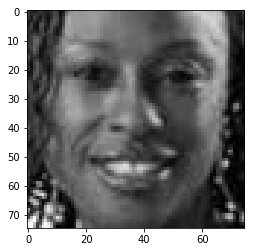

Previsão - Etnia: Negra Idade: 41.0 Gênero: Feminino
Valores reais - Etnia: Negra Idade: 35 Gênero: Masculino


In [130]:
file_path = files[np.random.randint(0,len(files))]
print_predictions(file_path)
age = file_path.split('/')[-1].split("_")[0]
gender = gender_dict[int(file_path.split("_")[1])]
ethni = ethni_dict[int(file_path.split("_")[2])]
print("Valores reais - Etnia: {} Idade: {} Gênero: {}".format(ethni,age,gender))

# Fim e muito obrigado!

![image.png](images/horse_ml.jpg)